# Yelp Data Challenge - Clustering and PCA

Yujun Zhou
   

Sep 2018


 
* Load, visualize data
* Extract Tf-Idf feature vectors from review data
* Perform PCA on review feature vectors
* Visualize variance explained
* Perform PCA review classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('clean_data/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-02-02,0,_Uwp6FO1X-avE9wqTMC59w,5,This place is first class in every way. Lobste...,0,-Z7Nw2UF7NiBSAzfXNA_XA


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [5]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

In [6]:
documents.shape

(640718,)

In [10]:
documents[:3]

array(["went for dinner tonight. Amazing my husband had lobster bisque and the T bone both were delish.I had the French onion soup and the pan seared duck. Cooked to perfection and I'm still raving about the flavor. If you are ever in Vegas this is a must try.",
       'This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return.',
       "My husband and I went there for lunch on a Saturday. We had a physically exhausting week so we decided to treat ourselves. But it hasn't always been easy for our allergy whenever we ate out. So we called Delmonico ahead to see if they can accommodate our special needs. The lady who answered our call was very courteous and we felt comfortable to try after having some answers from her.\r\nAs we arrived, the restaurant has a comfortable ambience. I wouldn't say it is grand or special but just comfortable. When it was time to order, the server was courteous regarding our allergy too and I believe the one who took care of us was 

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [11]:
# Make a column and take the values, save to a variable named "target"
df['favorable'] = df['stars']>4

In [17]:
target = df['favorable'].values

In [18]:
target[:5]

array([ True,  True,  True, False,  True])

#### You may want to look at the statistic of the target variable

In [19]:
# To be implemented
target.mean()

0.4741461922405801

In [20]:
target.shape

(640718,)

### Create training dataset and test dataset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train, documents_test, target_train, target_test = train_test_split(
    documents, target, test_size = 0.95, random_state=0
)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000)

In [26]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(documents_train).toarray()

In [27]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [29]:
# Use the trained model to transform all the reviews
vectors_documents = vectorizer.transform(documents).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [31]:
from sklearn.cluster import KMeans
kmeans= KMeans()
kmeans.fit(vectors_train)


#### Make predictions on all your data

In [47]:
# To be implemented
assigned_cluster = kmeans.predict(vectors_documents)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [48]:
 kmeans.cluster_centers_.shape

(8, 1000)

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [49]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feat:-1]

In [52]:
for num, centroid in enumerate(top_centroids):
    print (num, ", ".join(words[i] for i in centroid))

0 good, food, place, vegas, service, best, like, delicious, love
1 food, order, minutes, time, service, just, came, didn, table
2 chicken, fried, good, rice, food, ordered, place, great, sauce
3 sushi, rolls, place, ayce, roll, good, great, fresh, fish
4 burger, fries, burgers, good, shake, cheese, place, food, great
5 great, food, service, place, amazing, good, friendly, atmosphere, staff
6 pizza, crust, good, place, great, slice, cheese, best, order
7 breakfast, eggs, good, food, place, great, coffee, pancakes, service


#### Try different k
If you set k == to a different number, how does the top features change?

In [53]:
kmeans= KMeans(n_clusters=6)
kmeans.fit(vectors_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
 kmeans.cluster_centers_.shape

(6, 1000)

In [56]:
assigned_cluster = kmeans.predict(vectors_documents)

In [57]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feat:-1]
for num, centroid in enumerate(top_centroids):
    print (num, ", ".join(words[i] for i in centroid))

0 good, chicken, food, like, really, place, ordered, just, burger
1 pizza, crust, good, place, great, slice, cheese, order, time
2 great, food, service, place, good, amazing, atmosphere, friendly, staff
3 food, order, service, time, just, minutes, like, didn, place
4 sushi, rolls, place, ayce, roll, good, great, fresh, fish
5 place, food, best, amazing, vegas, love, service, delicious, friendly


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [58]:
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4, 5])

In [63]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0,vectors_documents.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster,2,replace=False)
    print ("=" * 30)
    print ("Cluster %d:" % i )
    for review_index in sample_reviews:
        print (df.ix[review_index]['stars'],)
        print(df.ix[review_index]['text'])
    print    

Cluster 0:
5
I was feeling hungry and it was pretty late, but Chin Chin was still open. The hostess was super sweet and seated us right away. Our waiter was great. He was genuine and very attentive. I got the bok choy and black mushrooms. It was seasoned well, however the mushrooms were a little tough. The SO got the Chinese chicken salad which was delicious. The dressing has a lot of ginger in it, so if you're not a ginger person you may want to choose something else. They have so much other yummy options I want to try.
2
Food was pretty good, typical bar food. We had to ask for a menu, nobody welcomed us, we weren't checked on for the entire dinner, we had to seek a waitress out to even get the dinner. The whole process was rushed and unprofessional
Cluster 1:
5
The Tuscan salad is amazing . I get it every time I come here . It was a recommendation from our server . The pizza is always good . The sauce on the pizza is delicious .
5
I've ordered the double cheesesteak add jalape帽os an

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [65]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
most_reviewed_restaurant = df['business_id'].value_counts().index[0]
df_top_restaurant = df[df['business_id']== most_reviewed_restaurant].copy().reset_index()

In [67]:
df_top_restaurant.head()

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,favorable
0,283639,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2015-09-16,0,gkcPdbblTvZDMSwx8nVEKw,5,Got here early on football Sunday 7:30am as I ...,0,SKteB5rgDlkkUa1Zxe1N0Q,True
1,283640,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-09-09,0,mQfl6ci46mu0xaZrkRUhlA,5,"This buffet is amazing. Yes, it is expensive,...",0,f638AHA_GoHbyDB7VFMz7A,True
2,283641,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-02-08,0,lMarDJDg4-e_0YoJOKJoWA,2,This place....lol our server was nice. But fo...,0,A21zMqdN76ueLZFpmbue0Q,False
3,283642,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-12-22,0,30xmXTzJwHPcqt0uvSLQhQ,3,One star knocked off for the cold air conditio...,0,uNHEnP28MMmVy96ZSJKaMA,False
4,283643,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2015-02-21,0,g8ojbzP1xoX9dbDfQv2KJw,5,Miche better experience this time around. We w...,0,3cZPpN-IrA8CSc5PkZLbXA,True


We can also load restaurant profile information from the business dataset (optional)

In [ ]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
pass

### Vectorize the text feature

In [70]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant =  df_top_restaurant['text'].values
documents_top_restaurant.shape

(4923,)

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [72]:
# Make a column and take the values, save to a variable named "target"
df_top_restaurant['favorable'] = df_top_restaurant['stars']>4
target_top_restaurant = df_top_restaurant['favorable'].values.astype(int)
target_top_restaurant

array([1, 1, 0, ..., 1, 0, 0])

#### Check the statistic of the target variable

In [76]:
target_top_restaurant.mean()
target_top_restaurant.shape

(4923,)

### Create training dataset and test dataset

In [74]:
from sklearn.cross_validation import train_test_split

In [77]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
X_train, X_test, y_train, y_test = train_test_split(
    documents_top_restaurant, target_top_restaurant, test_size = 0.3, random_state=0
)


In [79]:
X_train.shape, X_test.shape

((3446,), (1477,))

### Get NLP representation of the documents

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000)


In [82]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(X_train).toarray()



In [83]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()


In [84]:
# Use the trained model to transform the test data
vectors_test = vectorizer.transform(X_test).toarray()


In [85]:
# Use the trained model to transform all the data
vectors_documents_top_restaurant = vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [91]:
from sklearn.cluster import KMeans
kmeans= KMeans()
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [93]:
# To be implemented
assigned_cluster = kmeans.predict(vectors_documents_top_restaurant)

#### Inspect the centroids

In [94]:
kmeans.cluster_centers_.shape

(8, 1000)

#### Find the top 10 features for each cluster.

In [95]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feat:-1]


In [97]:
for num, centroid in enumerate(top_centroids):
    print (num, ", ".join(words[i] for i in centroid))

0 food, buffet, worth, amazing, price, place, quality, better, service
1 good, food, really, buffet, quality, place, price, like, pretty
2 buffet, station, section, food, seafood, dessert, crab, good, fresh
3 line, wait, time, hour, long, hours, food, pay, buffet
4 food, buffet, just, time, like, got, place, line, good
5 best, buffet, vegas, las, food, ve, buffets, worth, quality
6 great, food, buffet, service, selection, vegas, worth, definitely, variety
7 crab, legs, buffet, king, good, food, snow, like, oysters


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [99]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0,vectors_documents_top_restaurant.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster,2,replace=False)
    print ("=" * 30)
    print ("Cluster %d:" % i )
    for review_index in sample_reviews:
        print (df.ix[review_index]['stars'],)
        print(df.ix[review_index]['text'])
    print    

Cluster 0:
4
Amazing burger, although a bit pricey keeping in mind that in and out burger is nearby. Overall experience was good and would come back.
5
I have came here with my sister for the first time we where curious since we drive past it all the time . It was absolutely so good the server was awesome and welcomed us to the establishment .explained to us the menu and gave us some great pointers I of course took her recommendation and ate a delicious sandwich . Took half of it to my husband and he loved it than I went ahead and took my mom there and she was surprised at how much food she was given she said it was so much so she took some of it home . The hot sauces are amazing .. Specially papa bear .
Cluster 1:
4
This is our go-to buffet for a seafood crab night where we don't end up paying an arm and a leg.  Its not a high end strip buffet but its decent for the price.  Every Fridays between 4pm-9pm you're looking at spending 28.99 per person.  Go early because the line can get re

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [ ]:
np.unique(assigned_cluster)

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(vectors_train)
X_test_scaled = scaler.transform(vectors_test)



### Use PCA to transform data (train and test) and get princial components

In [102]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

pca = PCA(n_components = 50)

X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)
 


In [103]:
pca.components_.shape

(50, 1000)

### See how much (and how much percentage of) variance the principal components explain

In [104]:
pca.explained_variance_[:10]

array([8.08241957, 6.2917284 , 4.18562789, 3.89933031, 3.46287671,
       3.30665067, 3.20793363, 3.19033203, 3.02694676, 2.94805544])

In [105]:
pca.explained_variance_ratio_[:10]

array([0.00808007, 0.0062899 , 0.00418441, 0.0038982 , 0.00346187,
       0.00330569, 0.003207  , 0.00318941, 0.00302607, 0.0029472 ])

### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

Text(0,0.5,'Variance Explained')

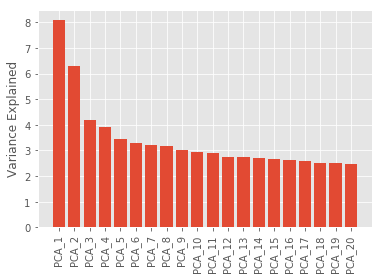

In [107]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) +1 
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure()
plt.bar(pca_range, pca.explained_variance_[:n_col_to_display],align='center')
xticks = plt.xticks(pca_range, pca_names,rotation =90)
plt.ylabel('Variance Explained')

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [112]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression
model_lrc = LogisticRegression()

model_lrc.fit(X_train_scaled, y_train)
 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
# Get score for training set
model_lrc.score(X_train_scaled,y_train)

0.922228670922809

In [110]:
# Get score for test set
model_lrc.score(X_test_scaled,y_test)

0.7528774542992552

#### Use (Stardardized + PCA) tf-idf vectors as features

In [113]:
# Build a Logistic Regression Classifier, train with PCA tranformed X
from sklearn.linear_model import LogisticRegression
model_lrc = LogisticRegression()

model_lrc.fit(X_train_pca, y_train)
 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
# Get score for training set
model_lrc.score(X_train_pca,y_train)

0.7951247823563552

In [115]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_lrc.score(X_test_pca,y_test)

0.7833446174678402

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

Typical overfitting.

Without using the pca, the training error is small, but testing error is big

with pca, training error is bigger, but testing error is smaller.

#### You can plot the coefficients against principal components


In [119]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names,model_lrc.coef_.flatten()))).sort_values(by=[1])
df_coeffs.columns = ['PC','coeff']
df_coeffs.head()

,PC,coeff
2,PC_3,-0.676797
1,PC_2,-0.371555
7,PC_8,-0.196305
6,PC_7,-0.176651
5,PC_6,-0.142184


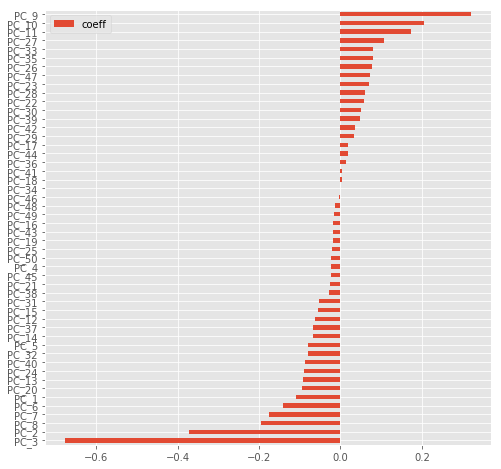

In [122]:
ax = df_coeffs.plot.barh(figsize=(8,8))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PC'])
plt.show()


### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [124]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, random_state=0)

model_rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [126]:
# Get score for training set
model_rfc.score(X_train_scaled,y_train)

0.9396401625072548

In [125]:
# Get score for test set
model_rfc.score(X_test_scaled,y_test)

0.7589708869329722

#### Use (Stardardized + PCA) tf-idf vectors as features

In [130]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier


model_rfc = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, random_state=0)

model_rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [131]:
# Get score for training set
model_rfc.score(X_train_pca,y_train)

0.9811375507835172

In [135]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rfc.score(X_test_pca,y_test)

0.7508463100880163

#### Q: What do you see from the training result and the test result?

PCA doesn't help random forest to deal with the overfitting problem.

#### You can plot the feature importances against principal components


In [138]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names,model_rfc.feature_importances_))).sort_values(by=[1])
df_coeffs.columns = ['PC','coeff']
df_coeffs.head()

,PC,coeff
33,PC_34,0.010619
49,PC_50,0.011508
45,PC_46,0.011649
16,PC_17,0.011776
15,PC_16,0.012077


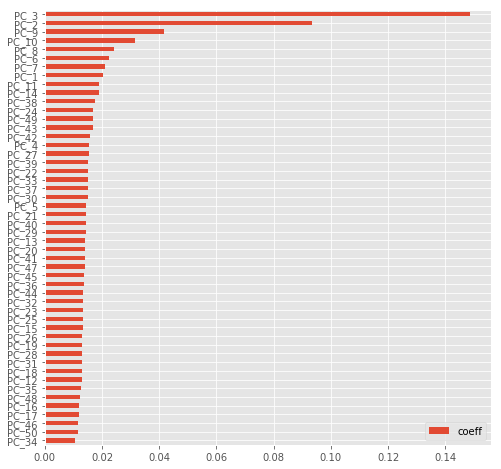

In [139]:
ax = df_coeffs.plot.barh(figsize=(8,8))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PC'])
plt.show()


Cluster restaurants from their category information


a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [ ]:
# To be implemented

Try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 
 
 [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

 Cosine distance or Euclidean distance?

In [ ]:
# To be implemented

cluster categories from business entities? What does it mean by a cluster?

 words can be clustered from the transposed tf-idf matrix.

In [1]:
# To be implemented

Characteristics of each of the clustered  

For each cluster, which restaurant can best represent ("define") its cluster?


In [ ]:
# To be implemented

other use cases that clustering can be used? 

In [ ]:
# To be implemented